11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


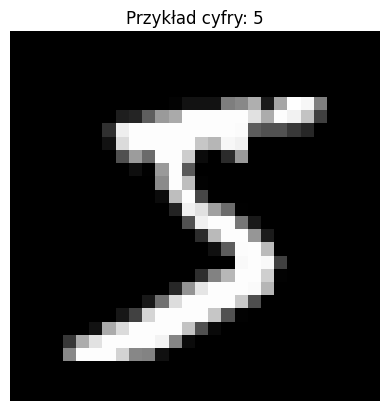

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


plt.imshow(x_train[0], cmap='gray')
plt.title(f"Przykład cyfry: {y_train[0]}")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
class SimpleCustomDataset(Dataset):
    def __init__(self, data, labels):
        if len(data) != len(labels):
            raise ValueError("Data and labels must have the same length")
        self.data = data
        self.labels = labels

    def __len__(self):

        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]

        if not isinstance(sample, torch.Tensor):
            sample = torch.tensor(sample, dtype=torch.float32)
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long)

        return sample, label


sample_data = x_train
sample_labels = y_train


custom_dataset = SimpleCustomDataset(sample_data, sample_labels)

print(f"Rozmiar zbioru danych: {len(custom_dataset)}")
print(f"Pierwsza próbka: {custom_dataset[0]}")
print(f"Trzecia próbka: {custom_dataset[2]}")

Rozmiar zbioru danych: 60000
Pierwsza próbka: (tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       

# Wnioski z poprzednich zadań


1.   Dane potrzebne do zrobienia zadania należy dopasować w taki sposób, żeby pasowały one do modelu. W tym przypadku ważne jest, aby obrazy zostały spłaszczone, co umożliwi dopasowanie ich do sieci.
2.   Wybór metryki jest istotny w kontekście zadania, ponieważ każda z dostępnych rodzajów inaczej wykonuje pomiary.
3.   Wizualizacja wyników sprawia, że łatwiej można je zinterpretować.






In [ ]:
class SimpleCustomDataset(Dataset):
    def __init__(self, data, labels):
        if len(data) != len(labels):
            raise ValueError("Data and labels must have the same length")
        self.data = data
        self.labels = labels

    def __len__(self):

        return len(self.data)

    def __getitem__(self, idx):

        sample = self.data[idx]
        label = self.labels[idx]


        if not isinstance(sample, torch.Tensor):
            sample = torch.tensor(sample, dtype=torch.float32)
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long)



        tensor = torch.tensor(sample, dtype=torch.float32)


        wektor_tensor = tensor.reshape(-1)
        sample = torch.tensor(sample, dtype=torch.float32).reshape(-1) / 255.0
        label = torch.tensor(label, dtype=torch.long)
        print(f"Oryginalny obrazek jako tensor:\n{tensor}\n")
        print(f"Spłaszczony obrazek jako wektor:\n{wektor_tensor}\n")

        return sample, label

sample_data = x_train
sample_labels = y_train

custom_dataset = SimpleCustomDataset(sample_data, sample_labels)

print(f"Rozmiar zbioru danych: {len(custom_dataset)}")
print(f"Pierwsza próbka: {custom_dataset[0]}")
print(f"Trzecia próbka: {custom_dataset[2]}")

from torch.utils.data import DataLoader

train_loader = DataLoader(custom_dataset, batch_size=64, shuffle=True)

for batch_data, batch_labels in train_loader:
    print(batch_data.shape)
    print(batch_labels.shape)
    break


Rozmiar zbioru danych: 60000
Oryginalny obrazek jako tensor:
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,

/tmp/ipython-input-3124086855.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(sample, dtype=torch.float32)
/tmp/ipython-input-3124086855.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample = torch.tensor(sample, dtype=torch.float32).reshape(-1) / 255.0
/tmp/ipython-input-3124086855.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label, dtype=torch.long)


Spłaszczony obrazek jako wektor:
tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  64., 249.,  64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  10., 232., 253., 122.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       

Tesuję dane z biblioteki na prostej sieci neuronowej zanim zostaną one wrzucone do poważniejszego modelu.

In [ ]:

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
input_dim = 784
hidden_dim = 128
output_dim = 10
model = SimpleNN(input_dim, hidden_dim, output_dim)

sample_input = torch.randn(64, input_dim)

output_tensor = model(sample_input)

print(f"Kształt wejściowego tensora: {sample_input.shape}")
print(f"Kształt wyjściowego tensora z sieci: {output_tensor.shape}")

train_loader = DataLoader(custom_dataset, batch_size=1, shuffle=False)

for batch_data, batch_labels in train_loader:
    print(f"Kształt batcha: {batch_data.shape}")
    print(f"Etykieta: {batch_labels.item()}")
    break

Kształt wejściowego tensora: torch.Size([64, 784])
Kształt wyjściowego tensora z sieci: torch.Size([64, 10])
Oryginalny obrazek jako tensor:
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 

/tmp/ipython-input-3124086855.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(sample, dtype=torch.float32)
/tmp/ipython-input-3124086855.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample = torch.tensor(sample, dtype=torch.float32).reshape(-1) / 255.0
/tmp/ipython-input-3124086855.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label, dtype=torch.long)


In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import time
import os
import random

SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Dzielę zestaw danych na dane treningowe, testowe oraz walidacyjne

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

data_root = "./data"
train_full = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_ds    = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)

val_size = 5000
train_size = len(train_full) - val_size
train_ds, val_ds = random_split(train_full, [train_size, val_size], generator=torch.Generator().manual_seed(SEED))

BATCH_SIZE = 128
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

len(train_ds), len(val_ds), len(test_ds)

100%|██████████| 9.91M/9.91M [00:00<00:00, 36.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.08MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 15.4MB/s]


(55000, 5000, 10000)

# Podstawowy model
Pzepuszczam dane przez niezmieniony model, żeby po dokonaniu zmian móc porównać wyniki. Co do wyboru metryki to zdecydowałam się na macierz korelaji ponieważ w ten sposób można zobaczyć w którym miejscu i ile razy pomylił się model.

In [ ]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.25)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)


In [ ]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.2166 acc 0.9327 | val loss 0.0614 acc 0.9832
Ep 02/5 | train loss 0.0681 acc 0.9787 | val loss 0.0477 acc 0.9858
Ep 03/5 | train loss 0.0499 acc 0.9847 | val loss 0.0443 acc 0.9880
Ep 04/5 | train loss 0.0406 acc 0.9871 | val loss 0.0413 acc 0.9880
Ep 05/5 | train loss 0.0339 acc 0.9894 | val loss 0.0336 acc 0.9896
Czas treningu: 427.6s


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Test accuracy: 0.9910


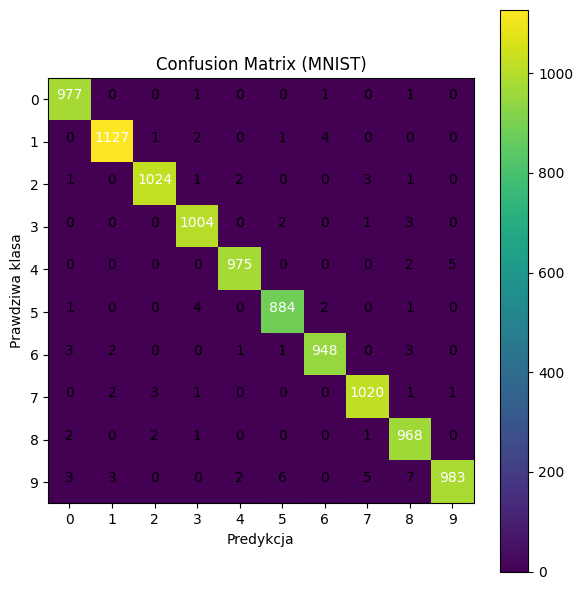

In [ ]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()


Na wyświetlonej powyżej wizualizacji można zobaczyć, że model działa w dużym stopniu poprawnie, choć nie jest on w stanie uniknąć pojedynczych błędów.

# Zmodyfikowany model
Aby polepszyć przewidywania modelu próbowałam dodawać nowe warstwy konwolucyjne lub BatchNorm. Jednak w przypadku tego zbioru nie należy dodawać zbyt wielu warstw, dlatego poprzestałam na jednej, dodatkowej warstwie konwolucyjnej oraz jednej BatchNorm. Ostatecznie zdecydowałam się na niezmienianie wysokości sieci, ponieważ w przypadku tego zbioru obrazów, przy zwiększeniu rozmiaru może wystąpić ryzyko przeuczenia, natomiast mniejszy rozmiar może doprowadzić do utraty istotnych szczegółów.

In [ ]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1 )
        self.BatchNorm1 = nn.BatchNorm2d(32)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.3)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

In [ ]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.2366 acc 0.9265 | val loss 0.0660 acc 0.9790
Ep 02/5 | train loss 0.0741 acc 0.9777 | val loss 0.0438 acc 0.9868
Ep 03/5 | train loss 0.0545 acc 0.9835 | val loss 0.0379 acc 0.9890
Ep 04/5 | train loss 0.0464 acc 0.9857 | val loss 0.0326 acc 0.9892
Ep 05/5 | train loss 0.0386 acc 0.9878 | val loss 0.0294 acc 0.9914
Czas treningu: 427.8s


Test accuracy: 0.9921


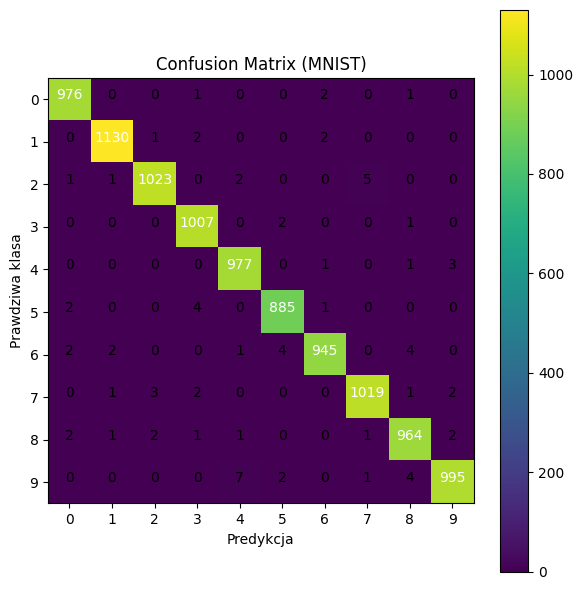

In [ ]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()

Po porównaniu wyników z poprzednim macierzem korelacyjnym można stwierdzić, że przy niektórych cyfrach pomylił się on więcej razy, ale występują też predykcje, które wyszły lepiej niż w przypadku poprzeniego modelu.

# Podsumowanie


1.   W przypadku przetwarzania obrazów istotne jest, aby spłaszczyć dane zanim zostaną one wrzucone do modelu
2.   Ilość warstw w modelu ma znaczenie i zależy od rodzaju danych. Nie należy używać zbyt wielu warstw, ale zbyt mała ilość może okazać się niewystarczająca.
3.  Wysokość modelu zależy od przetwarzanych obrazów.
2.   Warto porównywać wnioski sprzed i po modyfikacji modelu.



